In [2]:
from fastapi import FastAPI #, HTTPException
from pydantic import BaseModel
import mlflow
import mlflow.sklearn
import os

In [3]:
import requests

In [4]:
# Supposons que id_client est votre variable contenant l'ID du client
id_client = 403414

# Utilisez la variable id_client dans la requête
reponse_test_shap = requests.get(url='http://127.0.0.1:8000/shap', json={"index": id_client})

In [5]:
reponse_test_shap.text

'"{\\"shap_values\\": [[-0.13772704139940112, 0.008457680770055816, -8.602041364610399e-05, 0.0, 0.00032278225980464175, -0.03711319243048115, -0.1680007033673694, 0.06079259074065294, 0.013574485265281145, -0.09318713582371108, -0.1332758331900685, -0.018326595863772388, -0.1025121749905523, 0.028189884079517533, 0.0, 0.0, -0.004387074258830336, 0.0, 0.004765479759820903, 0.0, -4.792344495370585e-05, -0.0014965251028659, -0.002121746924280719, 0.011130215291421282, 0.0002882318308464373, 0.0, 0.0, -0.007714312236165733, 0.0, 0.0, -0.1498366016799389, -0.47328468419157477, 0.8775235002898577, -0.005058168506619129, -0.0009712925909534074, 0.003794801976817622, -0.0019026311320304, -7.733915726114733e-05, -9.342283279822817e-06, -2.5716293668332083e-05, 0.00020899222986718087, 0.00022857278770336908, 0.0016999347316364135, -0.0012257286583986205, -0.0012287816157981971, 0.0, 0.0009837199004159047, -0.0022807381275565465, 8.215791664030388e-05, 0.0018056103767260952, 0.0, -0.001288661727

In [6]:
type(reponse_test_shap)


requests.models.Response

In [22]:
# data_shap = reponse_test_shap.text.json()
# shap_values = data_shap['shap_values']

In [7]:
import requests
# Parti predict_proba
id_client = 403414
predict_proba_url = requests.get(url='http://127.0.0.1:8000/predict_proba', json = {"index": id_client})
response_predict_proba = predict_proba_url
data_predict_proba = response_predict_proba.json()

In [9]:
type(predict_proba_url.json()['predictions'][0][1])

float

In [7]:
data_predict_proba['predictions'][0][1]

0.34365846024357155

In [10]:
def percent_func(value):
    value = value *100
    value = round(value,2)
    return value
prediction_value = percent_func(data_predict_proba['predictions'][0][1])
print(f"Probabilité de faire défault : {prediction_value} %")

Probabilité de faire défault : 34.37 %


In [4]:
# Test Shap

In [39]:
import json

shap_url = requests.get(url='http://127.0.0.1:8000/shap', json = {"index": id_client})
response_shap = shap_url
data_shap = response_shap.json()
data_shap = json.loads(response_shap.text)

In [40]:
data_shap

'{"shap_values": [[-0.13772704139940112, 0.008457680770055816, -8.602041364610399e-05, 0.0, 0.00032278225980464175, -0.03711319243048115, -0.1680007033673694, 0.06079259074065294, 0.013574485265281145, -0.09318713582371108, -0.1332758331900685, -0.018326595863772388, -0.1025121749905523, 0.028189884079517533, 0.0, 0.0, -0.004387074258830336, 0.0, 0.004765479759820903, 0.0, -4.792344495370585e-05, -0.0014965251028659, -0.002121746924280719, 0.011130215291421282, 0.0002882318308464373, 0.0, 0.0, -0.007714312236165733, 0.0, 0.0, -0.1498366016799389, -0.47328468419157477, 0.8775235002898577, -0.005058168506619129, -0.0009712925909534074, 0.003794801976817622, -0.0019026311320304, -7.733915726114733e-05, -9.342283279822817e-06, -2.5716293668332083e-05, 0.00020899222986718087, 0.00022857278770336908, 0.0016999347316364135, -0.0012257286583986205, -0.0012287816157981971, 0.0, 0.0009837199004159047, -0.0022807381275565465, 8.215791664030388e-05, 0.0018056103767260952, 0.0, -0.00128866172790391

In [41]:
mon_dic = json.loads(data_shap)
mon_dic

{'shap_values': [[-0.13772704139940112,
   0.008457680770055816,
   -8.602041364610399e-05,
   0.0,
   0.00032278225980464175,
   -0.03711319243048115,
   -0.1680007033673694,
   0.06079259074065294,
   0.013574485265281145,
   -0.09318713582371108,
   -0.1332758331900685,
   -0.018326595863772388,
   -0.1025121749905523,
   0.028189884079517533,
   0.0,
   0.0,
   -0.004387074258830336,
   0.0,
   0.004765479759820903,
   0.0,
   -4.792344495370585e-05,
   -0.0014965251028659,
   -0.002121746924280719,
   0.011130215291421282,
   0.0002882318308464373,
   0.0,
   0.0,
   -0.007714312236165733,
   0.0,
   0.0,
   -0.1498366016799389,
   -0.47328468419157477,
   0.8775235002898577,
   -0.005058168506619129,
   -0.0009712925909534074,
   0.003794801976817622,
   -0.0019026311320304,
   -7.733915726114733e-05,
   -9.342283279822817e-06,
   -2.5716293668332083e-05,
   0.00020899222986718087,
   0.00022857278770336908,
   0.0016999347316364135,
   -0.0012257286583986205,
   -0.0012287816157

In [32]:
type(mon_dic)

dict

In [33]:
import pandas as pd
X = pd.DataFrame(mon_dic['X'])
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
348806,1,0,0,0,225000.0,213322.5,13761.0,162000.0,0.031329,-21410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
import numpy as np
shap_values = (np.array(mon_dic['shap_values']))
shap_values.shape

(1, 795)

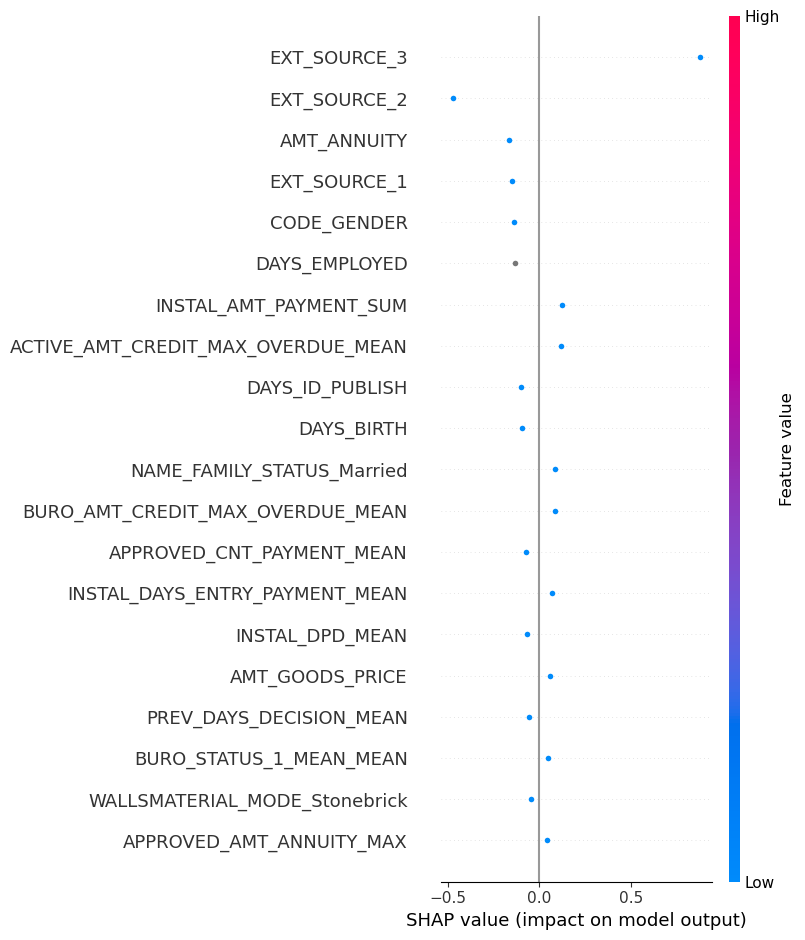

DeltaGenerator()

In [37]:
import streamlit as st
import shap
import matplotlib.pyplot as plt
import numpy as np 
shap_plot = shap.summary_plot(shap_values, X, feature_names=X.columns)
st.pyplot(shap_plot)

In [44]:
# shap.plots.waterfall(shap_values)

In [45]:
# import shap
# import matplotlib.pyplot as plt
# import numpy as np

# # Exemple de Shap values pour un individu
# # shap_values = np.random.randn(20)

# # Création du graphique en lollipop
# fig, ax = plt.subplots()
# feature_names = [f'Feature {i+1}' for i in range(len(shap_values))]
# ax.vlines(feature_names, 0, shap_values, color='blue', lw=4)
# ax.plot(feature_names, shap_values, 'o', markersize=8, color='red')
# ax.set_ylabel('Shap Value')
# ax.set_title('Shap Values Lollipop Plot')

# plt.show()


In [ ]:
# fin du programme 
end

In [25]:
response_shap.content

b'"{\\"shap_values\\": [[-0.13772704139940112, 0.008457680770055816, -8.602041364610399e-05, 0.0, 0.00032278225980464175, -0.03711319243048115, -0.1680007033673694, 0.06079259074065294, 0.013574485265281145, -0.09318713582371108, -0.1332758331900685, -0.018326595863772388, -0.1025121749905523, 0.028189884079517533, 0.0, 0.0, -0.004387074258830336, 0.0, 0.004765479759820903, 0.0, -4.792344495370585e-05, -0.0014965251028659, -0.002121746924280719, 0.011130215291421282, 0.0002882318308464373, 0.0, 0.0, -0.007714312236165733, 0.0, 0.0, -0.1498366016799389, -0.47328468419157477, 0.8775235002898577, -0.005058168506619129, -0.0009712925909534074, 0.003794801976817622, -0.0019026311320304, -7.733915726114733e-05, -9.342283279822817e-06, -2.5716293668332083e-05, 0.00020899222986718087, 0.00022857278770336908, 0.0016999347316364135, -0.0012257286583986205, -0.0012287816157981971, 0.0, 0.0009837199004159047, -0.0022807381275565465, 8.215791664030388e-05, 0.0018056103767260952, 0.0, -0.00128866172

In [18]:
tt = shap_url.json()

In [19]:
tt

'{"shap_values": [[-0.13772704139940112, 0.008457680770055816, -8.602041364610399e-05, 0.0, 0.00032278225980464175, -0.03711319243048115, -0.1680007033673694, 0.06079259074065294, 0.013574485265281145, -0.09318713582371108, -0.1332758331900685, -0.018326595863772388, -0.1025121749905523, 0.028189884079517533, 0.0, 0.0, -0.004387074258830336, 0.0, 0.004765479759820903, 0.0, -4.792344495370585e-05, -0.0014965251028659, -0.002121746924280719, 0.011130215291421282, 0.0002882318308464373, 0.0, 0.0, -0.007714312236165733, 0.0, 0.0, -0.1498366016799389, -0.47328468419157477, 0.8775235002898577, -0.005058168506619129, -0.0009712925909534074, 0.003794801976817622, -0.0019026311320304, -7.733915726114733e-05, -9.342283279822817e-06, -2.5716293668332083e-05, 0.00020899222986718087, 0.00022857278770336908, 0.0016999347316364135, -0.0012257286583986205, -0.0012287816157981971, 0.0, 0.0009837199004159047, -0.0022807381275565465, 8.215791664030388e-05, 0.0018056103767260952, 0.0, -0.00128866172790391

In [66]:
import numpy as np
# Convertire un liste d'array en object array
def numpy_hook(dct):
    for key, value in dct.items():
        if isinstance(value, list):
            dct[key] = np.array(value)
    return dct

# Reconvertir le JSON en dictionnaire en utilisant le hook numpy_hook
dictionnaire_resultat_json = json.loads(tt, object_hook=numpy_hook)
type(dictionnaire_resultat_json)

dict

In [20]:
shap_values = dictionnaire_resultat_json["shap_values"]
shap_values = shap_values.reshape(1,-1)
shap_values

NameError: name 'dictionnaire_resultat_json' is not defined

In [18]:

import json

# print(response_shap.content)
# data_shap = response_shap.json()
# print(type(data_shap))
# print(data_shap.get('shap_values'))
data_shap = json.loads(response_shap.content)

In [19]:
print(type(data_shap))

<class 'str'>


In [21]:
# shap_values = data_shap['shap_values']
data_shap['shap_values']

TypeError: string indices must be integers

In [21]:
data_predict_proba = response_predict_proba.json()
predictions = data_predict_proba['predictions']

In [22]:
client_id = 403414

reponse_test = requests.get(url='http://127.0.0.1:8000/predict_proba', data= '{"index": {client_id} }')

In [23]:
reponse_test_shap = requests.get(url='http://127.0.0.1:8000/shap', data= '{"index": 403414 }')

In [7]:
print(reponse_test_shap.text)

"{\"shap_values\": [[[0.13772704139940112, -0.008457680770055816, 8.602041364610399e-05, 0.0, -0.00032278225980464175, 0.03711319243048115, 0.1680007033673694, -0.06079259074065294, -0.013574485265281145, 0.09318713582371108, 0.1332758331900685, 0.018326595863772388, 0.1025121749905523, -0.028189884079517533, 0.0, 0.0, 0.004387074258830336, 0.0, -0.004765479759820903, 0.0, 4.792344495370585e-05, 0.0014965251028659, 0.002121746924280719, -0.011130215291421282, -0.0002882318308464373, 0.0, 0.0, 0.007714312236165733, 0.0, 0.0, 0.1498366016799389, 0.47328468419157477, -0.8775235002898577, 0.005058168506619129, 0.0009712925909534074, -0.003794801976817622, 0.0019026311320304, 7.733915726114733e-05, 9.342283279822817e-06, 2.5716293668332083e-05, -0.00020899222986718087, -0.00022857278770336908, -0.0016999347316364135, 0.0012257286583986205, 0.0012287816157981971, 0.0, -0.0009837199004159047, 0.0022807381275565465, -8.215791664030388e-05, -0.0018056103767260952, 0.0, 0.001288661727903919, 0.0

In [12]:
reponse_test.json

<bound method Response.json of <Response [422]>>

In [13]:
print(reponse_test.text)

{"detail":[{"type":"json_invalid","loc":["body",11],"msg":"JSON decode error","input":{},"ctx":{"error":"Expecting property name enclosed in double quotes"}}]}


In [10]:
client_id = 403414
shap_url = f"http://127.0.0.1:8000/shap?index={client_id}
response_shap = requests.get(shap_url)

SyntaxError: EOL while scanning string literal (2079399992.py, line 2)